Ejercicio 2

Análisis Descriptivo y Exploratorio de Dataframes sobre Tipos de Cambio y Turismo en Argentina

Objetivo:
El propósito de este ejercicio es realizar un análisis descriptivo y exploratorio de dos dataframes, relacionados con los tipos de cambio oficial y paralelo en Argentina y la cantidad de turistas que llegaron desde países limítrofes. El análisis permitirá conocer mejor la distribución de las variables y las posibles relaciones entre ellas, asegurando que los datos sean precisos y confiables antes de continuar con el análisis.
Instrucciones:
1. Importar los dos dataframes desde el archivo "tc_turistas.xlsx": un dataframe con datos diarios de tipos de cambio oficial y paralelo en Argentina durante el período de junio de 2017 a febrero de 2020, y otro con la cantidad de turistas que llegaron desde países limítrofes en frecuencia mensual.
2. Ajustar la frecuencia del dataframe de tipos de cambio a mensual, para que sea compatible con el dataframe de turistas.
3. Explorar ambos dataframes mediante gráficos y medidas de resumen. Verificar la distribución de las variables, la presencia de valores faltantes o extremos, y las correlaciones entre las variables.
4. Realizar un análisis exploratorio de los datos para conocer mejor la distribución de los mismos y las posibles relaciones entre las variables.
5. Si se encuentra algún problema en los datos, determine la mejor manera de solucionarlo. Verificar que los datos sean precisos y confiables antes de continuar con el análisis.
6. Realizar cualquier tarea de limpieza o curación de los datos que sea necesaria para asegurar la calidad de la información.
7. Presentar los hallazgos y conclusiones del análisis, destacando cualquier patrón o tendencia que resulte relevante y contribuya a una mayor comprensión de las relaciones entre las variables estudiadas.
8. Escribir el informe incluyendo código Python utilizado, las visualizaciones y las conclusiones en un cuaderno Google Colab. El dataframe final curado debe ser exportado a formato .parquet.




In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
#Ruta de dataset:
#Modificar en caso de utilizar un archivo que no se encuentra en el directorio raíz
ruta_dataset='/content/tc_turistas.xlsx'

## Creación de dataframes a partir de dataset provisto

El dataset en formato xlsx está dividido en dos hojas del mismo libro.

Se cargan en dos dataframes.



---


*   Dataframe_1: "tipo_cambio"

TIPOS DE CAMBIO NOMINALES PARA EL DÓLAR OFICIAL Y EL DÓLAR BLUE 
DESDE 1  DE JUNIO DE 2017 A 29 DE FEBRERO DE 2020


---


*   Dataframe_2: "turistas"

datos de llegadas de turistas de paises limitrofés a la Argentina para el período enero 2013 -mar 2021

frecuencia mensual

Son turistas llegados, no tomar en cuenta la parte decimal. 

---

In [67]:
tipo_cambio=pd.read_excel(ruta_dataset, sheet_name=0)

In [68]:
turistas=pd.read_excel(ruta_dataset, sheet_name=2)

In [69]:
tipo_cambio

,FECHA,DOLAR Oficial,DOLAR Blue
0,2017-06-01,16.25,16.30
1,2017-06-02,16.20,16.32
2,2017-06-03,NaN,NaN
3,2017-06-04,NaN,NaN
4,2017-06-05,16.20,16.34
...,...,...,...
999,2020-02-25,NaN,NaN
1000,2020-02-26,63.75,78.70
1001,2020-02-27,63.75,78.50
1002,2020-02-28,64.00,78.50


In [70]:
turistas

,anio,mes,date,Bolivia,Brasil,Chile,Paraguay,Uruguay
0,2013,ene,41275,141417.459190,112996.623524,66007.699999,50277.720853,52456.413939
1,2013,feb,41306,95204.256341,161366.098439,62013.313451,52666.951095,41377.875955
2,2013,mar,41334,82862.061107,96727.365114,81096.057038,92714.958474,43728.713276
3,2013,abr,41365,72009.462620,66978.888460,55096.585327,67716.242304,27458.646062
4,2013,may,41395,79131.435938,63886.966089,61641.446807,70544.694702,23592.398421
...,...,...,...,...,...,...,...,...
94,2020,nov,44136,1868.060742,1148.292597,1428.614468,704.834018,594.506976
95,2020,dic,44166,3475.369209,2825.002741,2039.197452,1181.105147,1262.908653
96,2021,ene,44197,2103.968847,2280.762734,936.002013,420.318600,3618.940424
97,2021,feb,44228,874.787203,1419.760103,476.856105,879.535790,1713.991928


Acondicionamiento de datos: turistas



a.   Columna "date": al trabajar con frecuencia mensual, no se utilizará en el análisis.

b.   Truncar columnas de cantidades de turistas.

c.   Para análisis posteriores se reemplazará la identificación de mes por el número correspondiente en formato entero





In [71]:
#a
turistas.drop(columns='date', inplace=True)

In [72]:
#b
turistas['Bolivia']=turistas['Bolivia'].astype(int)
turistas['Brasil']=turistas['Brasil'].astype(int)
turistas['Chile']=turistas['Chile'].astype(int)
turistas['Paraguay']=turistas['Paraguay'].astype(int)
turistas['Uruguay']=turistas['Uruguay'].astype(int)


In [73]:
#c
id_meses={'ene':1,'feb':2,'mar':3,'abr':4,'may':5,'jun':6,'jul':7,'ago':8,'sep':9,'oct':10,'nov':11,'dic':12}
turistas['mes']=turistas['mes'].replace(id_meses)

In [74]:
#Dataframe acondicionado
turistas

,anio,mes,Bolivia,Brasil,Chile,Paraguay,Uruguay
0,2013,1,141417,112996,66007,50277,52456
1,2013,2,95204,161366,62013,52666,41377
2,2013,3,82862,96727,81096,92714,43728
3,2013,4,72009,66978,55096,67716,27458
4,2013,5,79131,63886,61641,70544,23592
...,...,...,...,...,...,...,...
94,2020,11,1868,1148,1428,704,594
95,2020,12,3475,2825,2039,1181,1262
96,2021,1,2103,2280,936,420,3618
97,2021,2,874,1419,476,879,1713


## Ajuste de frecuencias entre dataframes

El dataframe "tipo_cambio" tiene una frecuencia de datos diaria.

a. Generaremos un nuevo dataframe "tipo_cambio_mes" con los promedios del valor de cambio de cada mes.

b. Luego, le damos el mismo formato que el dataframe "turistas".

In [75]:
#a
tipo_cambio_mes=tipo_cambio.set_index('FECHA').resample('M').mean().round(2)
tipo_cambio_mes.reset_index(inplace=True)

In [76]:
#b
tipo_cambio_mes['FECHA']=tipo_cambio_mes['FECHA'].astype(str)
tipo_cambio_mes[['anio', 'mes', 'dia']] = tipo_cambio_mes['FECHA'].str.split('-', expand=True)
tipo_cambio_mes.drop(columns=['FECHA','dia'], inplace=True)
tipo_cambio_mes=tipo_cambio_mes[['anio','mes','DOLAR Oficial','DOLAR Blue']]
tipo_cambio_mes['anio']=tipo_cambio_mes['anio'].astype(int)
tipo_cambio_mes['mes']=tipo_cambio_mes['mes'].astype(int)

In [77]:
#Dataframe acondicionado
tipo_cambio_mes

,anio,mes,DOLAR Oficial,DOLAR Blue
0,2017,6,16.32,16.51
1,2017,7,17.40,17.12
2,2017,8,17.62,18.18
3,2017,9,17.45,17.95
4,2017,10,17.67,17.97
5,2017,11,17.68,18.05
6,2017,12,17.94,18.30
7,2018,1,19.28,19.66
8,2018,2,20.08,20.15
9,2018,3,20.49,20.74


## Exploración de dataframes mediante gráficos y medidas de resumen.
## Búsqueda de valores faltantes o anómalos.
## Corrección de datos no válidos encontrados.

### Dataframe: tipo_cambio_mes

In [78]:
# Valores relevantes de los tipos de cambio

print("\nDOLAR Blue\n-----------------\n", 
      tipo_cambio_mes['DOLAR Blue'].describe(),
      '\n\n',
      "DOLAR Oficial\n-----------------\n",
      tipo_cambio_mes['DOLAR Oficial'].describe())


DOLAR Blue
-----------------
 count    33.000000
mean     37.706364
std      18.932991
min      16.510000
25%      20.150000
50%      37.950000
75%      44.740000
max      78.190000
Name: DOLAR Blue, dtype: float64 

 DOLAR Oficial
-----------------
 count    33.000000
mean     36.026667
std      16.249408
min      16.320000
25%      20.080000
50%      37.950000
75%      44.740000
max      63.310000
Name: DOLAR Oficial, dtype: float64


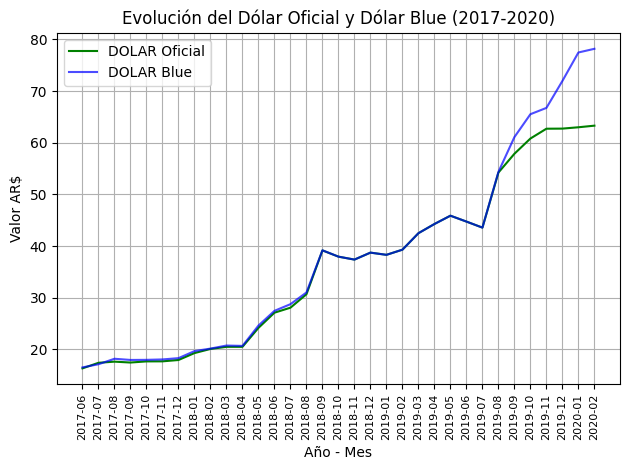

In [79]:
#Evolución de tipo de cambio en el período informado

tipo_cambio_mes['fecha'] = pd.to_datetime(tipo_cambio_mes['anio'].astype(str) + '-' + tipo_cambio_mes['mes'].astype(str)).dt.strftime('%Y-%m')
tipo_cambio_mes.set_index('fecha', inplace=True)

plt.plot(tipo_cambio_mes.index, tipo_cambio_mes['DOLAR Oficial'], label='DOLAR Oficial', color='Green')
plt.plot(tipo_cambio_mes.index, tipo_cambio_mes['DOLAR Blue'], label='DOLAR Blue', color='Blue', alpha=0.7)
plt.xlabel('Año - Mes')
plt.ylabel('Valor AR$')
plt.title('Evolución del Dólar Oficial y Dólar Blue (2017-2020)')
plt.legend()
plt.xticks(rotation=90)
plt.xticks(tipo_cambio_mes.index, tipo_cambio_mes.index, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

### Dataframe: turistas

In [80]:
print("\nBolivia\n-----------------\n",
      turistas['Bolivia'].describe(),
      "\n\n",
      "\nBrasil\n-----------------\n",
      turistas['Brasil'].describe(),
      "\n\n",
      "\nChile\n-----------------\n",
      turistas['Chile'].describe(),
      "\n\n",
      "\nParaguay\n-----------------\n",
      turistas['Paraguay'].describe(),
      "\n\n",
      "\nUruguay\n-----------------\n",
      turistas['Uruguay'].describe())



Bolivia
-----------------
 count        99.000000
mean      92308.101010
std       41284.177903
min           0.000000
25%       83523.000000
50%       96403.000000
75%      113500.000000
max      187955.000000
Name: Bolivia, dtype: float64 

 
Brasil
-----------------
 count        99.000000
mean      84345.858586
std       48905.746244
min           0.000000
25%       60852.000000
50%       82062.000000
75%      103991.500000
max      242582.000000
Name: Brasil, dtype: float64 

 
Chile
-----------------
 count    9.900000e+01
mean     5.776150e+12
std      5.747196e+13
min      0.000000e+00
25%      5.593250e+04
50%      6.560200e+04
75%      7.832950e+04
max      5.718388e+14
Name: Chile, dtype: float64 

 
Paraguay
-----------------
 count        99.000000
mean      60989.060606
std       29121.810147
min           0.000000
25%       50328.000000
50%       65150.000000
75%       75239.000000
max      138972.000000
Name: Paraguay, dtype: float64 

 
Uruguay
-----------------
 coun

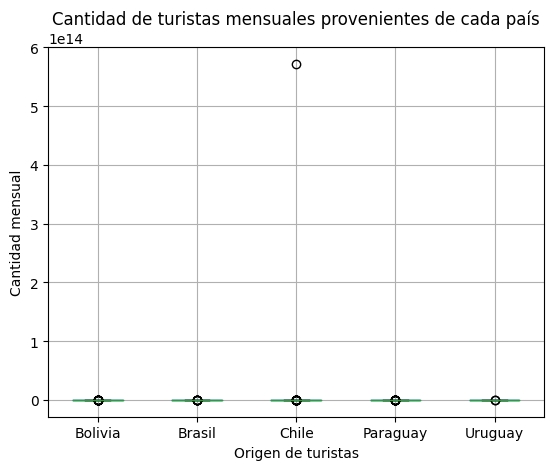

In [81]:

fig, ax = plt.subplots()
turistas[['Bolivia','Brasil','Chile','Paraguay','Uruguay']].boxplot(ax=ax)

ax.set_xlabel('Origen de turistas')
ax.set_ylabel('Cantidad mensual')
ax.set_title('Cantidad de turistas mensuales provenientes de cada país')
plt.show()



### En la serie correspondiente a Chile se puede observar que los datos en la función describe difieren demasiado del resto del dataset, esto nos da el indicio de que algúnos datos no son válidos. 
### Lo mismo se observa en los boxplot.
### Utilizamos un gráfico de dispersión para buscar esos valores y luego corregirlos.


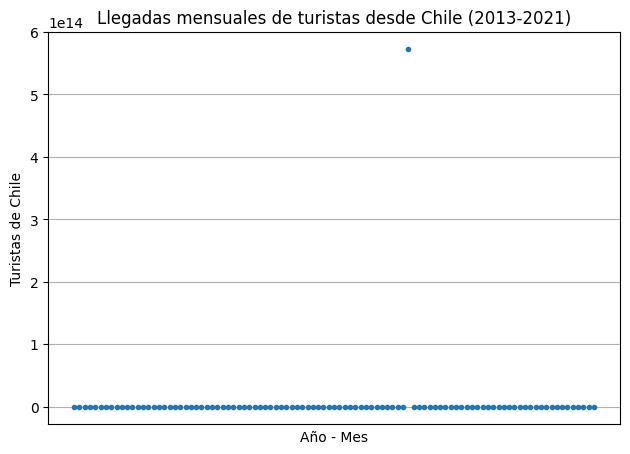

In [82]:
turistas['fecha'] = pd.to_datetime(turistas['anio'].astype(str) + '-' + turistas['mes'].astype(str)).dt.strftime('%Y-%m')
turistas.set_index('fecha', inplace=True)

plt.plot(turistas.index, turistas['Chile'], marker='.', linestyle='none')
plt.xlabel('Año - Mes')
plt.ylabel('Turistas de Chile')
plt.title('Llegadas mensuales de turistas desde Chile (2013-2021)')
plt.xticks([])
plt.grid(True)
plt.tight_layout()
plt.show()

#### Parece haber un único valor no válido.

####a.  Buscamos a qué Mes-Año corresponde.

#### b.  Verificamos si puede ser corregido comparando con el mismo mes de años anteriores/posteriores.

In [83]:
#3.a
indice_val_inv_ch = turistas['Chile'].index[turistas['Chile']==turistas['Chile'].max()]
print(indice_val_inv_ch,
      "\n\n",
      turistas['Chile'].max())

#El valor corresponde al mes de Abril del año 2018

Index(['2018-04'], dtype='object', name='fecha') 

 571838802363218


In [84]:
#3.b
turistas_abril=turistas.loc[turistas['mes']==4]
turistas_abril

,anio,mes,Bolivia,Brasil,Chile,Paraguay,Uruguay
fecha,,,,,,,
2013-04,2013,4,72009,66978,55096,67716,27458
2014-04,2014,4,100938,85746,65910,138972,26336
2015-04,2015,4,87276,86529,58519,100055,28214
2016-04,2016,4,74357,65139,48189,53654,31109
2017-04,2017,4,86564,73792,67179,78953,32310
2018-04,2018,4,87508,77916,571838802363218,57205,34821
2019-04,2019,4,96598,87520,65602,94127,35323
2020-04,2020,4,0,0,0,0,0


Para todos los casos de estudio, en el mes de Abril la llegada de turistas desde Chile es del orden de las decenas de miles. Esto es bastante similar en el resto de los orígenes de turistas.

Para acondicionar el dato inválido, verificando los valores inciales del dataset, suponemos que el dato original debería haber sido 57183,8802363218.

Dividimos el valor por 10^10 y tomamos la parte entera (al igual que en el punto 1)

In [85]:
if (turistas['Chile'].loc['2018-04']>10**6):  #Agregamos esta condición para no repetir corrección en la ejecución de los códigos.
  turistas['Chile'].loc['2018-04']=(turistas['Chile'].loc['2018-04']/10**10).astype(int)
turistas['Chile'].loc['2018-04']  

57183

### Repetimos el análisis

In [86]:
#Repetimos el análisis
print("\nBolivia\n-----------------\n",
      turistas['Bolivia'].describe(),
      "\n\n",
      "\nBrasil\n-----------------\n",
      turistas['Brasil'].describe(),
      "\n\n",
      "\nChile\n-----------------\n",
      turistas['Chile'].describe(),
      "\n\n",
      "\nParaguay\n-----------------\n",
      turistas['Paraguay'].describe(),
      "\n\n",
      "\nUruguay\n-----------------\n",
      turistas['Uruguay'].describe())


Bolivia
-----------------
 count        99.000000
mean      92308.101010
std       41284.177903
min           0.000000
25%       83523.000000
50%       96403.000000
75%      113500.000000
max      187955.000000
Name: Bolivia, dtype: float64 

 
Brasil
-----------------
 count        99.000000
mean      84345.858586
std       48905.746244
min           0.000000
25%       60852.000000
50%       82062.000000
75%      103991.500000
max      242582.000000
Name: Brasil, dtype: float64 

 
Chile
-----------------
 count        99.000000
mean      64732.505051
std       32625.069607
min           0.000000
25%       55932.500000
50%       64807.000000
75%       77669.500000
max      162180.000000
Name: Chile, dtype: float64 

 
Paraguay
-----------------
 count        99.000000
mean      60989.060606
std       29121.810147
min           0.000000
25%       50328.000000
50%       65150.000000
75%       75239.000000
max      138972.000000
Name: Paraguay, dtype: float64 

 
Uruguay
---------------

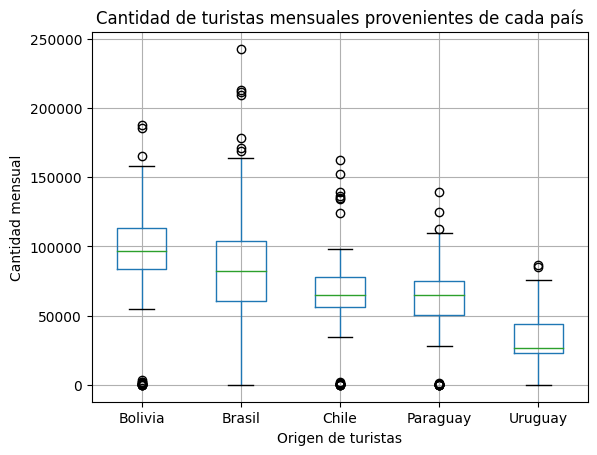

In [87]:
fig, ax = plt.subplots()
turistas[['Bolivia','Brasil','Chile','Paraguay','Uruguay']].boxplot(ax=ax)

ax.set_xlabel('Origen de turistas')
ax.set_ylabel('Cantidad mensual')
ax.set_title('Cantidad de turistas mensuales provenientes de cada país')
plt.show()


### Otro caso que nos llama la atención es Brasil.
### Observando el boxplot y analizando los valores de interés, presenta un valor máximo de mas del doble que el 3er cuartil.

In [88]:
#Buscamos los valores superiores a 200.000

indice_val_inv_br = turistas['Brasil'].loc[turistas['Brasil']>200000]
print(indice_val_inv_br)


fecha
2014-02    212658
2015-02    242582
2016-02    211806
2020-02    208970
Name: Brasil, dtype: int64


Todos estos valores corresponden al mes de Febrero pero en diferentes años.

Esto coincide con el período de vacaciones de verano, por lo que podemos tomarlos como válidos frente al resto de los meses del año.

Concluimos que en el mes de Febrero se produce un notable incremento en la llegada de turistas provenientes de Brasil.

### Visualización completa

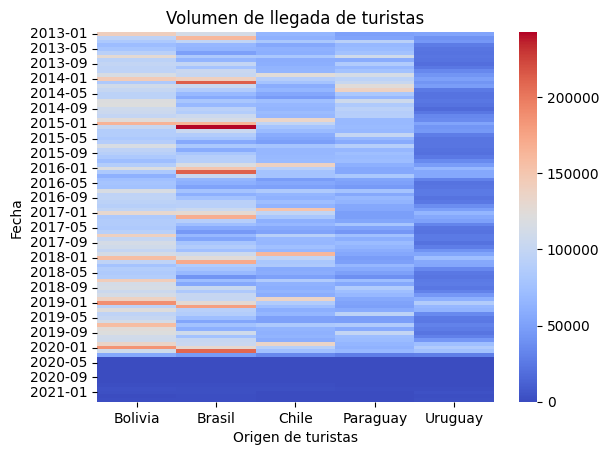

In [89]:
#Utilizamos un gráfico del tipo heatmap para observar la distribucipón de los valores
datos = turistas[['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']]

sns.heatmap(datos, cmap='coolwarm')
plt.xlabel('Origen de turistas')
plt.ylabel('Fecha')
plt.title('Volumen de llegada de turistas')
plt.show()

A raíz de la pandemia mundial de COVID-19, la llegada de turistas a partir del mes de Abril de 2020 es significativamente menor al resto de los registros.

En nuestro caso, los datos que utilizaremos para contrastar con los registros de tipos de cambios están comprendidos entre Junio del 2017 y Febrero del 2020, por lo que los datos mencionados quedarán excluidos.

## Analisis de datos

#### Gráfico 1
En primer lugar, repetiremos el gráfico heatmap acotado en el período de interés.

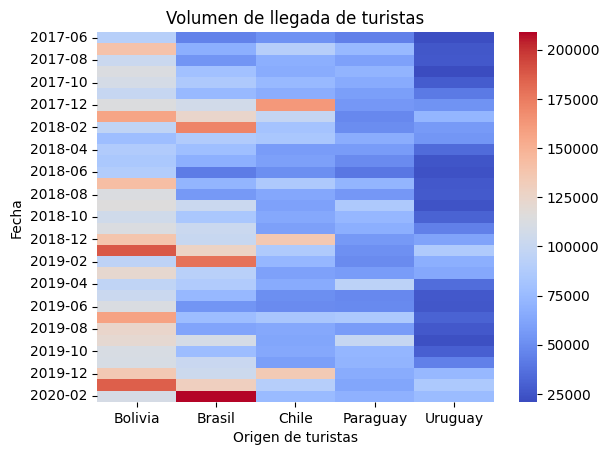

In [90]:
turistas['fecha_dt'] = pd.to_datetime(turistas.index)
datos = turistas[['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']].loc[(turistas['fecha_dt'] >= '2017-06') & (turistas['fecha_dt'] <= '2020-02')]

sns.heatmap(datos, cmap='coolwarm')
plt.xlabel('Origen de turistas')
plt.ylabel('Fecha')
plt.title('Volumen de llegada de turistas')
plt.show()

A partir de este gráfico podríamos clasificar los orígenes de turistas en tres grupos según las cantidades mensuales:

Bolivia y Brasil representan la mayor cantidad de turistas mensuales; Paraguay y Uruguay son los orígenes menos frecuentes de turistas; Chile se encuentra en un intermedio entre estos grupos, con algunos valores altos en algunos meses en particular.

####Gráfico 2

Generamos un nuevo dataframe combinando los anteriores y obteniendo valores totalizados.

In [91]:
df_comb=pd.concat([datos,tipo_cambio_mes],axis=1)
df_comb['Total']=df_comb['Bolivia']+df_comb['Brasil']+df_comb['Chile']+df_comb['Paraguay']+df_comb['Uruguay']
df_comb


,Bolivia,Brasil,Chile,Paraguay,Uruguay,anio,mes,DOLAR Oficial,DOLAR Blue,Total
fecha,,,,,,,,,,
2017-06,91354,44950,51901,44105,22149,2017,6,16.32,16.51,254459
2017-07,139655,67292,90150,74440,25872,2017,7,17.40,17.12,397409
2017-08,101980,53708,67773,60127,26348,2017,8,17.62,18.18,309936
2017-09,113370,79188,66416,70244,20974,2017,9,17.45,17.95,350192
2017-10,108988,86278,74250,65150,27705,2017,10,17.67,17.97,362371
2017-11,100106,73925,67212,58810,41117,2017,11,17.68,18.05,341170
2017-12,113630,106258,162180,54931,53165,2017,12,17.94,18.30,490164
2018-01,156813,124143,98232,47638,72066,2018,1,19.28,19.66,498892
2018-02,96556,170947,80980,49857,56729,2018,2,20.08,20.15,455069


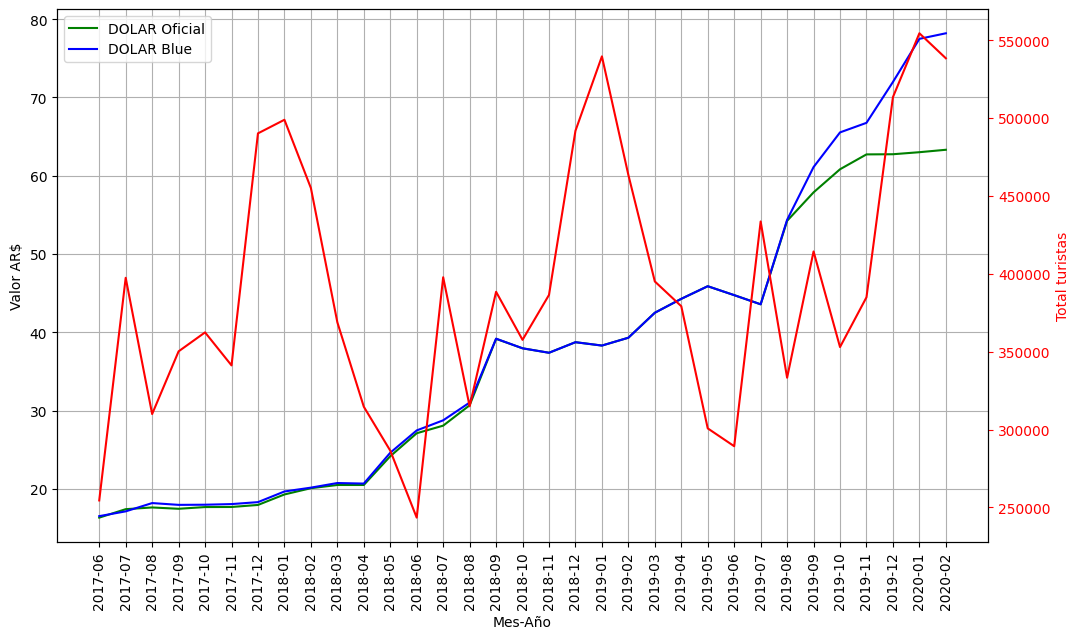

In [92]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

ax1.plot(df_comb.index, df_comb['DOLAR Oficial'], label='DOLAR Oficial', color='Green')
ax1.plot(df_comb.index, df_comb['DOLAR Blue'], label='DOLAR Blue', color='Blue')
ax1.set_xlabel('Mes-Año')
ax1.set_ylabel('Valor AR$')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df_comb.index, df_comb['Total'], label='Turistas', color='Red')
ax2.set_ylabel('Total turistas', color='Red')
ax2.tick_params(axis='y', colors='Red')

plt.show()

A partir de este gráfico podemos identificar los meses de Diciembre, Enero y Febrero como el período donde se presentan los picos de turismo, independientemente del valor de cambio o de la brecha entre el valor del Dólar Ofical y el Dólar Blue.

Dentro de esos trimestres, la cantidad máxima de turistas en el período estudiado coincide con el momento de mayor brecha de cambio.



#### Gráfico 3

Analizaremos estos meses en particular para observar la distribución de los orígenes de los turistas.

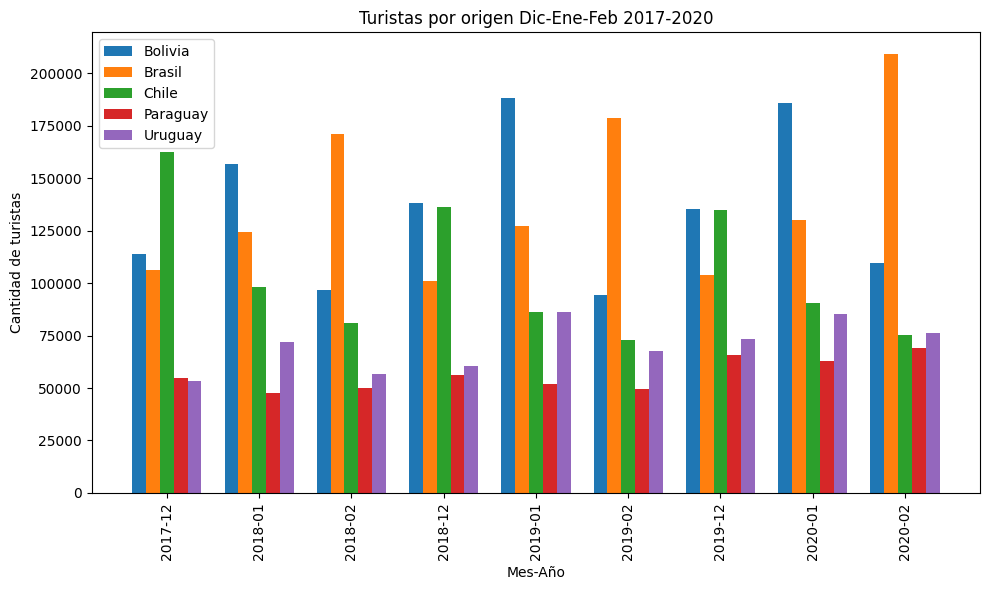

In [93]:
datos_dic_feb=df_comb[['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']].loc[(df_comb['mes']==12)|(df_comb['mes'] == 1)|(df_comb['mes'] == 2)]

fig, ax = plt.subplots(figsize=(10,6))
ind = np.arange(len(datos_dic_feb.index))
width = 0.15

rects1 = ax.bar(ind, datos_dic_feb['Bolivia'], width, label='Bolivia')
rects2 = ax.bar(ind + width, datos_dic_feb['Brasil'], width, label='Brasil')
rects3 = ax.bar(ind + 2*width, datos_dic_feb['Chile'], width, label='Chile')
rects4 = ax.bar(ind + 3*width, datos_dic_feb['Paraguay'], width, label='Paraguay')
rects5 = ax.bar(ind + 4*width, datos_dic_feb['Uruguay'], width, label='Uruguay')


ax.set_xticks(ind + 2*width)
ax.set_xticklabels(datos_dic_feb.index, rotation=90)
ax.set_ylabel('Cantidad de turistas')
ax.set_xlabel('Mes-Año')
ax.set_title('Turistas por origen Dic-Ene-Feb 2017-2020')
ax.legend()

plt.tight_layout()
plt.show()

#### Conclusiones:

Pudimos categorizar los orígenes de turistas según la cantidad mensual, observando tres grupos de volumen bien definidos.

Identificamos un patrón de distribución del ingreso de turistas con máximos locales en los meses vacacionales, independiente del valor de cambio.

Sin embargo, el máximo global del período en estudio lo encontramos en el momento de mayor brecha de cambio Oficial-Blue. Esto lo podemos interpretar como un factor favorable económicamente para los turistas.

Finalmente observamos las proporciones de turistas de diferentes orígenes, confirmando la categorización del primer punto.

In [94]:
# Dataframe final curado exportado a formato .parquet
df_comb.to_parquet('/content/ejercicio2.parquet')